### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리
- 장점 : 스케일링이나 정규화 불필요 --> 성능의 영향이 없음, 쉬운 알고리즘
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼 파라미터 존재
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 --> 단, 여러개의 DT가 모이면 성능이 강해짐
- 앙상블에 주로 사용함

In [24]:
# 1. 모듈로딩 및 데이터 준비

In [25]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# 데이터 로딩
featuredf, target = load_iris(as_frame=True, return_X_y=True)
print(f'{featuredf.shape}, {featuredf.ndim}D')
print(f'{target.shape}, {target.ndim}D')


(150, 4), 2D
(150,), 1D


In [26]:
# 학습용 데이터셋 준비
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(featuredf, target, random_state=10, stratify=target)

print(f'{X_train.shape}, {X_train.ndim}D')
print(f'{X_test.shape}, {X_test.ndim}D')

print(f'{y_train.shape}, {y_train.ndim}D')
print(f'{y_test.shape}, {y_test.ndim}D')


(112, 4), 2D
(38, 4), 2D
(112,), 1D
(38,), 1D


In [27]:
# 학습 - 튜닝 없이 그냥 학습
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

# 모델 파라미터 : 학습fit() 후에 학습용 데이터셋을 기반으로 설정된 값들
print(model.classes_)
print(model.n_classes_)
print(model.max_features_)
print()
print(model.feature_names_in_)
print(model.feature_importances_)



[0 1 2]
3
4

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[0.03125249 0.         0.06844775 0.90029976]


# 성능 체크

In [28]:
# 먼저 학습용 데이터셋의 score
train_score=model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score, test_score)

1.0 1.0


In [29]:
# 교차 검증 -> 데이터셋 부족 해결 및 과대적함을 피하기 위해서
from sklearn.model_selection import StratifiedKFold, cross_validate
model2= DecisionTreeClassifier(random_state=1)

# 교차 검증 준비 -> 모델 인스턴스, train 데이터셋 , CV=5[기본값]
res = cross_validate(model2, X_train, y_train, return_estimator=True, return_train_score=True)

# dict -> DataFrame
resdf = pd.DataFrame(res)
resdf

,fit_time,score_time,estimator,test_score,train_score
0,0.000000,0.000000,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.009858,0.000999,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.003000,0.001999,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.002000,0.002492,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.002999,0.002000,DecisionTreeClassifier(random_state=1),0.909091,1.0


성능향상을 위한 튜닝 -> 하이퍼 파라미터 설정
- 단점 : 과대적합
    * amx_depth, min_samples_leaf, .... -> 많음


In [30]:
from sklearn.model_selection import GridSearchCV
# 하이퍼 파라미터 dict 생성
parmas = {'max_depth':[4,3,2,1], 
          'min_samples_leaf':[5,3,2]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parmas)
grid.fit(X_train, y_train)

# 모델 파라미터 확인
print(grid.best_params_)
print('-'*50)
print(grid.best_score_)
print('-'*50)
print(grid.best_estimator_)
print('-'*50)
print(grid.best_index_)
print('-'*50)
print(grid.cv_results_)

{'max_depth': 4, 'min_samples_leaf': 2}
--------------------------------------------------
0.9371541501976285
--------------------------------------------------
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
--------------------------------------------------
2
--------------------------------------------------
{'mean_fit_time': array([0.00160747, 0.00052643, 0.00386515, 0.00101204, 0.00082507,
       0.00120831, 0.00120769, 0.00047274, 0.00347753, 0.00016689,
       0.        , 0.00326247]), 'std_fit_time': array([1.19624169e-03, 6.73357282e-04, 6.26085984e-03, 2.19759343e-06,
       9.80525428e-04, 4.01500710e-04, 3.96746958e-04, 5.89923102e-04,
       6.07821911e-03, 3.33786011e-04, 0.00000000e+00, 6.52494431e-03]), 'mean_score_time': array([0.00133038, 0.0002017 , 0.00065055, 0.00108604, 0.00276265,
       0.00102506, 0.00120025, 0.00019965, 0.00031977, 0.00267448,
       0.        , 0.00021596]), 'std_score_time': array([5.11281669e-04, 4.03404236e-04, 5.35475467e-04, 1.46

In [31]:
griddf = pd.DataFrame(grid.cv_results_)
griddf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001607,0.001196,0.001330,0.000511,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
1,0.000526,0.000673,0.000202,0.000403,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
2,0.003865,0.006261,0.000651,0.000535,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,0.909091,0.909091,0.937154,0.022925,1
3,0.001012,0.000002,0.001086,0.000146,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.863636,0.954545,0.928458,0.036299,2
4,0.000825,0.000981,0.002763,0.004396,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,8
5,0.001208,0.000402,0.001025,0.000038,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.863636,0.909091,0.919368,0.034262,8
6,0.001208,0.000397,0.001200,0.000402,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
7,0.000473,0.000590,0.000200,0.000399,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
8,0.003478,0.006078,0.000320,0.000478,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,0.909091,0.909091,0.928458,0.022163,2
9,0.000167,0.000334,0.002674,0.005349,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,0.636364,0.636364,0.651779,0.016601,10


In [32]:
best_model=grid.best_estimator_
print(best_model.max_depth)
print(best_model.min_samples_leaf)

# 피쳐 중요도 및 개수
print(best_model.feature_importances_, best_model.n_features_in_)

4
2
[0.01321873 0.         0.59964451 0.38713677] 4


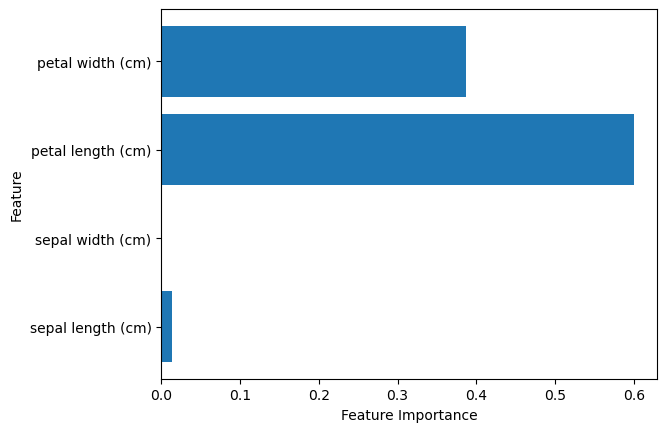

In [33]:
import matplotlib.pyplot as plt
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- DT 그래프 시각화
    *Graphviz 프로그램 설치 + python용 패키지 graphviz 설치

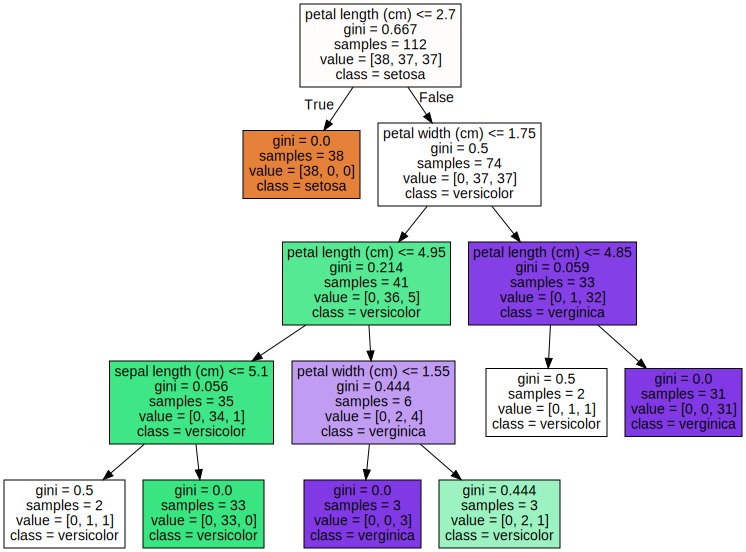

In [34]:
## DT모델을 dot 포맷의 파일로 저장 0< export_graphviz()
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot', class_names = ['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_, impurity=True, filled=True)
# dot 파일 출력
import graphviz
with open('tree.dot') as f :
    dot_data=f.read()
# 화면에 출력하기
graphviz.Source(dot_data)


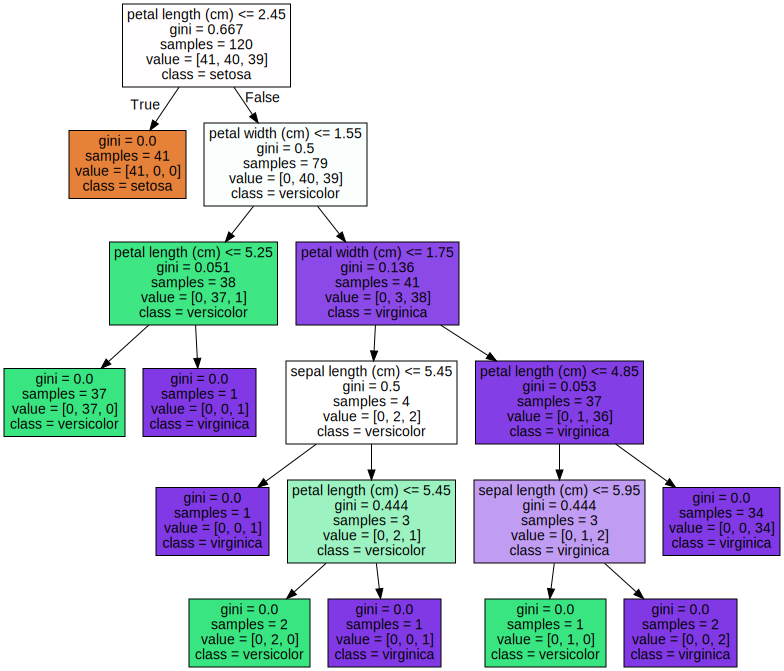

In [35]:
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train1, X_test1, y_train1, y_test1 = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train1, y_train1)

export_graphviz(dt_clf, out_file='tree2.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

새로운 데이터에 대한 예측

In [42]:
new_data=featuredf.iloc[:1]+0.21
print(new_data.shape)

print(best_model.predict(new_data))
print(best_model.predict_proba(new_data))

(1, 4)
[0]
[[1. 0. 0.]]
